<a href="https://colab.research.google.com/github/rahmanziaur/DTClassifierTest/blob/main/2_sklearn_50col_100k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount your Google Drive to save the processed .csv file

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rahmanziaur/DTClassifierTest/main/diabetic_data_exceptDiag.csv')

# Cat-> Num race: Caucasian =1, AfricanAmerican =2, Asian =3, Other =4 
df['race'] = df['race'].replace('Caucasian', 1)
df['race'] = df['race'].replace('AfricanAmerican', 2)
df['race'] = df['race'].replace('Asian', 3)
df['race'] = df['race'].replace('?', 3)
df['race'] = df['race'].replace('Hispanic', 4)
df['race'] = df['race'].replace('Other', 5)

#Cat-> Num gender: Female = 1, male 2
df['gender'] = df['gender'].replace('Female', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('?', 1)

#df['gender'] = df['gender'].astype(str).astype(int)

# Cat -> Num age [0-10) =1, ... [90-100) = 10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)

# Cat -> Num 'discharge_disposition_id' replaced with fewer choices, though was numeric
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)

# Cat --> 'admission_source_id'

df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

# Cat -> Num 'Change'
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)

# Cat -> Num 'diabetesMed'
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

# # Cat -> Num 'admission_source_id'
# df100['admission_source_id'] = df100['admission_source_id'].replace(6,4)

# Cat -> Num 'A1Cresult'

df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)

#Cat -> Num 'max_glu_serum'

df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

# dropping columns with missing data or has lesser relation

df = df.drop(['gender','weight','payer_code', 'medical_specialty', 'citoglipton', 'examide'], axis=1)

#added a new column to sum up three related columns

df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

#All similar data columns are shown by a new columns namely 'numchane' then, changed values at once through loop

keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]

for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

# Cat --> Num 'readmitted' to be target variable (class)
# If target columns '>30' becomes '2' meaning 3 choices, accuracy drop to 60

df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)



print("Data Types: ")
print(df.dtypes)

#Checking for missing values in the data

missing = 'NULL'
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())
         missing = 'YES'

print("Missing values:", missing)
# Saving the pre-processed data into a new file
df.to_csv('/content/drive/MyDrive/0_ColabDatasets/Processed3_TestDiabData_excepDiag.csv')

# Download the dataset and put the target column at the end and then apply next codes

Data Types: 
encounter_id                int64
patient_nbr                 int64
race                        int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
acetohexamide               int64
glipizide                   int64
glyburide                   int64
tolbutamide                 int64
pioglitazone                int64
rosiglitazone               int64
acarbose                    int64
m

In [3]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#warnings.filterwarnings('always') 

# Copy the path of the .csv file produced earlier
dataset=pd.read_csv('/content/drive/MyDrive/0_ColabDatasets/Processed3_TestDiabData_excepDiag.csv')

# dropping 'gender' because object to int type change issue
del dataset[dataset.columns[0]]

# moving the target column at the end
column_to_move = dataset.pop('readmitted')
dataset.insert(len(dataset.columns), 'readmitted', column_to_move)


#dataset.gender = dataset.gender.astype('int64')

# dataset = dataset.drop(['gender'], axis=1)
#dataset.head()
# print(dataset.shape)
# print(list(dataset.columns))
feature_cols= list(dataset.columns[:-1])

target_cols=list(dataset.columns[-1:])
#target_cols

#split dataset in features and target variable
X = dataset.drop('readmitted', axis=1) # Features
y = dataset['readmitted'] # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Check the shape of all of these
# print("X_train shape is : ", X_train.shape)
# print("X_test shape  is : ", X_test.shape)
# print("y_train shape is : ", y_train.shape)
# print("y_test shape is  : ", y_test.shape)

#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[27168    42]
 [ 3274    46]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     27210
           1       0.52      0.01      0.03      3320

    accuracy                           0.89     30530
   macro avg       0.71      0.51      0.48     30530
weighted avg       0.85      0.89      0.84     30530



In [4]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.8913855224369472
Precision: 0.5227272727272727
Recall: 0.013855421686746987
F1 Score: 0.026995305164319243
Mean Absolute Error: 0.10861447756305273
Cohens kappa: 0.02150008428221717
ROC AUC: 0.5061559357606833
Train Time(s):  10.526395957000005
Test Time(s):  0.7589961609999989


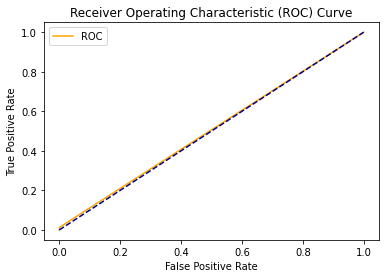

In [5]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('/content/drive/MyDrive/0_ColabDatasets/RF-Result3.csv')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

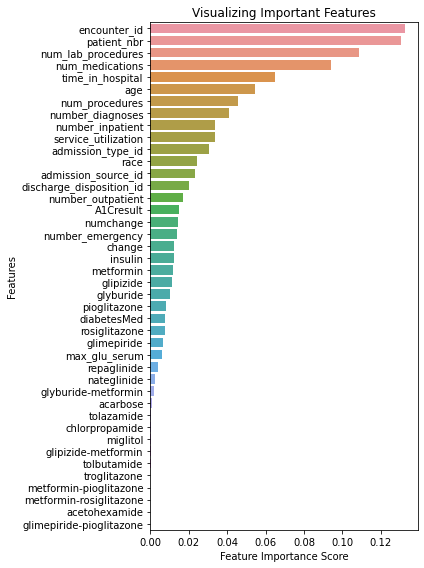

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
# feature_imp

#width = 0.35

fig = plt.figure(figsize=(6,8))

#plt.bar(feature_imp, feature_imp.index)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.tight_layout()
#plt.savefig('f7.pdf')
plt.show()

# fig = plt.figure(figsize=(13,7),)
# ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
# ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
# ax.set(xlabel='Time in Hospital', ylabel='Frequency')
# plt.title('Time in Hospital VS. Readmission')